# Mapping qubits
In this notebook we will cover the QGym `InitialMapping` environment.

This environment is aimed at solving the problem of mapping virtual to physical qubits that have a certain topology.

In [28]:
%matplotlib inline
import numpy as np
import networkx as nx
from networkx.generators import fast_gnp_random_graph
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from IPython.display import clear_output

from qgym.envs.initial_mapping import InitialMapping
from qgym.envs.initial_mapping.initial_mapping_rewarders import *

In [12]:
def render_rgb(step, rgb_array):
    clear_output(wait=True)
    plt.figure(figsize=(40, 20))
    plt.title(f"Step {step}", fontsize=40)
    plt.imshow(rgb_array)
    plt.axis("off")
    plt.show()

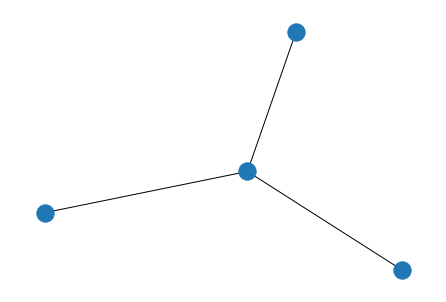

In [3]:
connection_graph = nx.Graph()
connection_graph.add_edge(1, 2)
connection_graph.add_edge(1, 3)
connection_graph.add_edge(1, 4)
connection_graph.number_of_nodes()
nx.draw(connection_graph)

In [4]:
env = InitialMapping(0.5, connection_graph=connection_graph)
env.rewarder = EpisodeRewarder(illegal_action_penalty=0)
check_env(env, warn=True)

model = PPO("MultiInputPolicy", env, verbose=1)

model.learn(int(1e5))

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.5     |
|    ep_rew_mean     | 13.2     |
| time/              |          |
|    fps             | 1157     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 22.3        |
|    ep_rew_mean          | 12.7        |
| time/                   |             |
|    fps                  | 877         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009392557 |
|    clip_fraction        | 0.0655      |
|    clip_range           | 0.2         |
|    entropy_loss   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.8        |
|    ep_rew_mean          | 12.4        |
| time/                   |             |
|    fps                  | 705         |
|    iterations           | 11          |
|    time_elapsed         | 31          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.010472545 |
|    clip_fraction        | 0.0836      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.65       |
|    explained_variance   | 0.578       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.5         |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0143     |
|    value_loss           | 12.4        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 14.7  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 11.4        |
|    ep_rew_mean          | 15.1        |
| time/                   |             |
|    fps                  | 706         |
|    iterations           | 21          |
|    time_elapsed         | 60          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.013085118 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.35       |
|    explained_variance   | 0.756       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.18        |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0188     |
|    value_loss           | 9.58        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 12.5  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 8.65        |
|    ep_rew_mean          | 18.2        |
| time/                   |             |
|    fps                  | 705         |
|    iterations           | 31          |
|    time_elapsed         | 90          |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.017001929 |
|    clip_fraction        | 0.193       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.86       |
|    explained_variance   | 0.798       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.78        |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.0252     |
|    value_loss           | 7.13        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 7.62  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 4.98        |
|    ep_rew_mean          | 20.4        |
| time/                   |             |
|    fps                  | 696         |
|    iterations           | 41          |
|    time_elapsed         | 120         |
|    total_timesteps      | 83968       |
| train/                  |             |
|    approx_kl            | 0.014918968 |
|    clip_fraction        | 0.176       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.3        |
|    explained_variance   | 0.924       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.97        |
|    n_updates            | 400         |
|    policy_gradient_loss | -0.0186     |
|    value_loss           | 2.27        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 4.71  

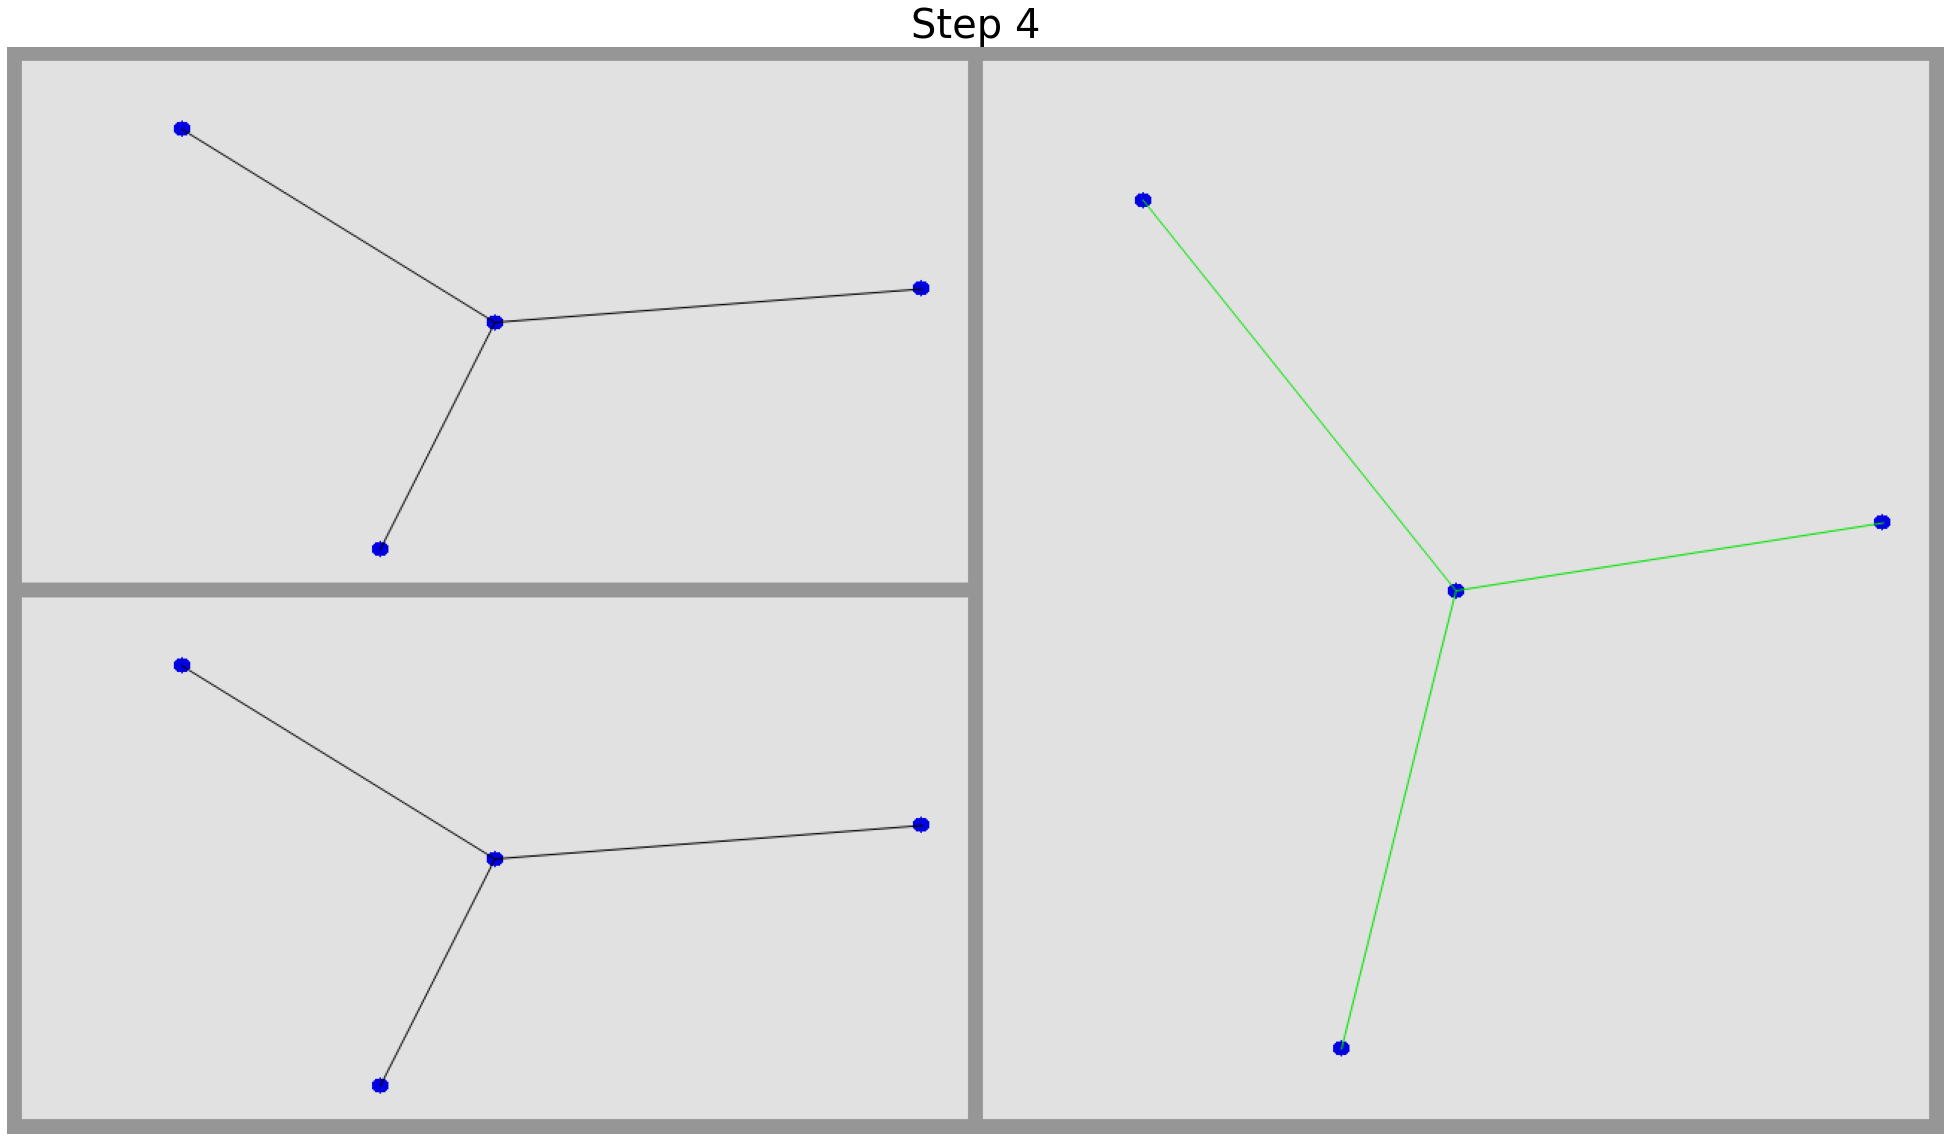

In [17]:
obs = env.reset(interaction_graph=connection_graph)
for i in range(1000):
    action, states = model.predict(obs, deterministic=False)
    obs, rewards, done, info = env.step(action)
    render_rgb(i, env.render(mode="rgb_array"))
    if done:
        break

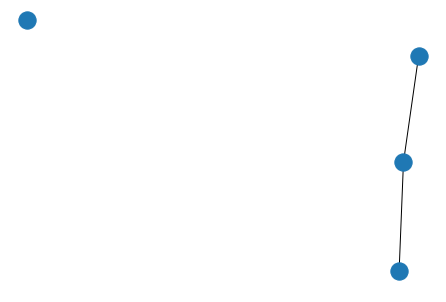

In [19]:
interaction_graph = connection_graph.copy()
interaction_graph.remove_edge(1, 3)
nx.draw(interaction_graph)

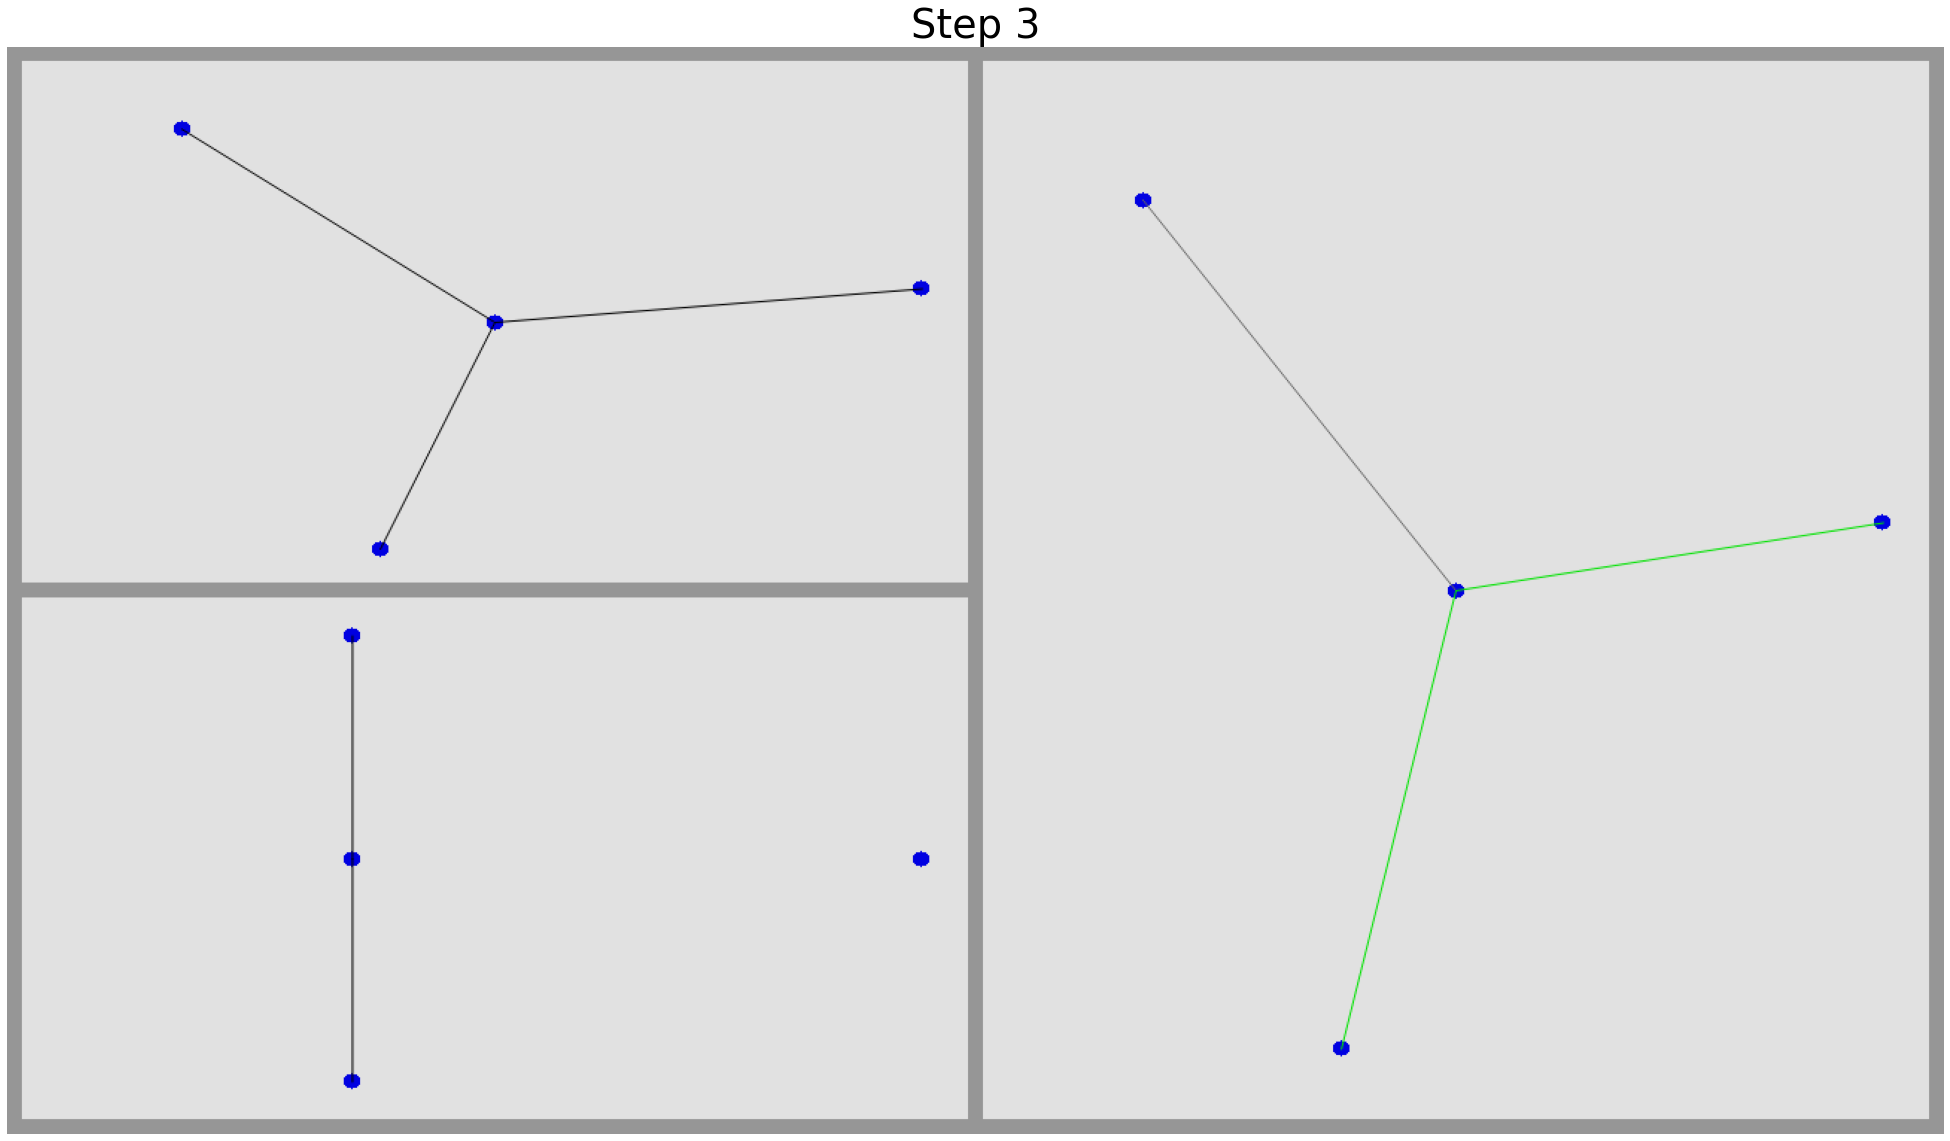

In [20]:
obs = env.reset(interaction_graph=interaction_graph)
for i in range(1000):
    action, states = model.predict(obs, deterministic=False)
    obs, rewards, done, info = env.step(action)
    render_rgb(i, env.render(mode="rgb_array"))
    if done:
        break

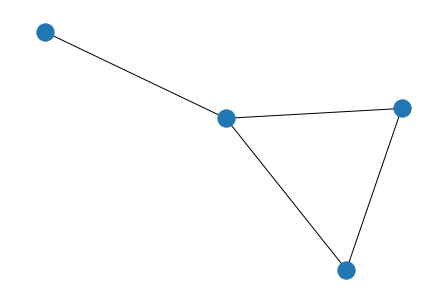

In [23]:
interaction_graph = connection_graph.copy()
interaction_graph.add_edge(3, 2)
nx.draw(interaction_graph)

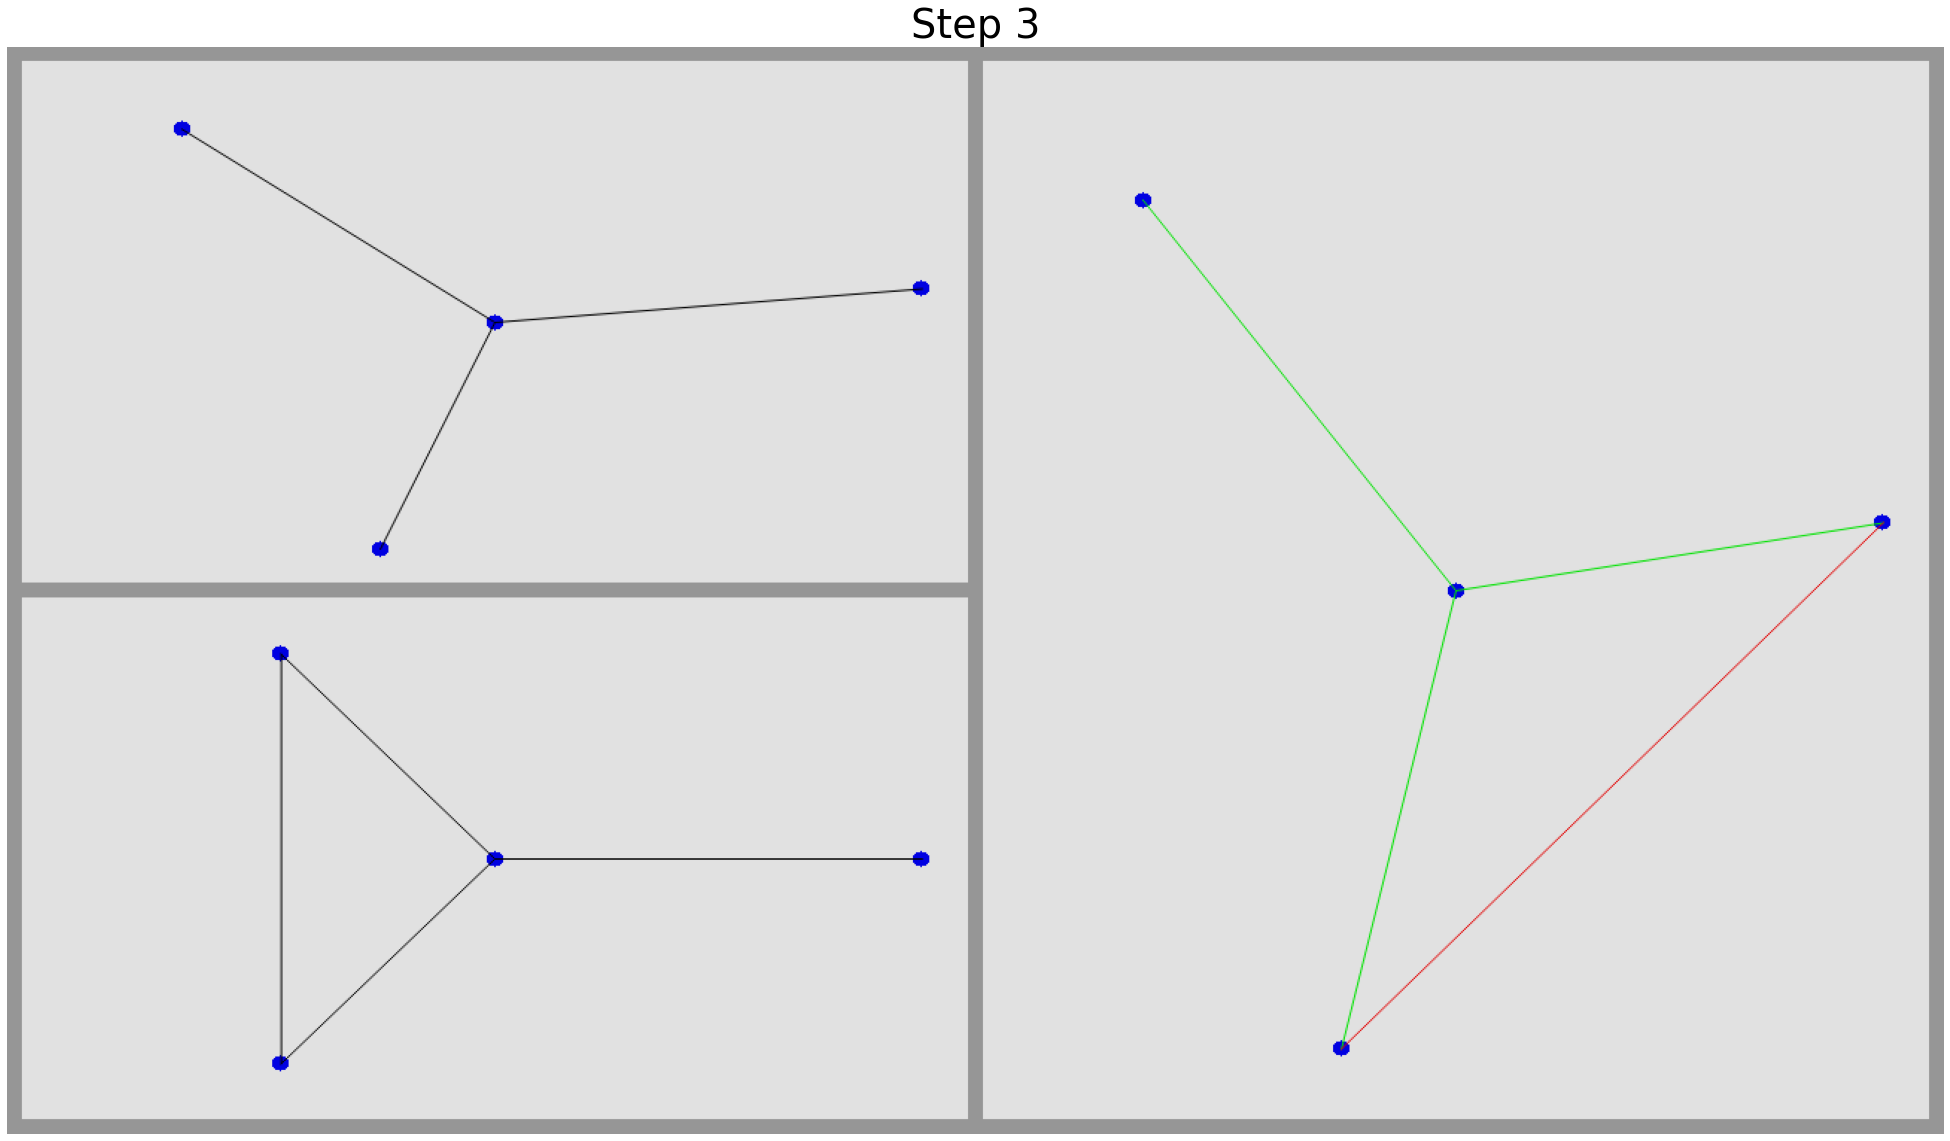

In [25]:
obs = env.reset(interaction_graph=interaction_graph)
for i in range(1000):
    action, states = model.predict(obs, deterministic=False)
    obs, rewards, done, info = env.step(action)
    render_rgb(i, env.render(mode="rgb_array"))
    if done:
        break

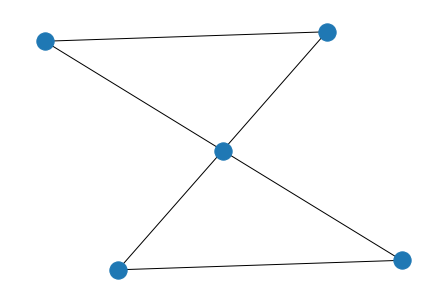

In [26]:
connection_graph = nx.Graph()
connection_graph.add_edge(0, 1)
connection_graph.add_edge(1, 2)
connection_graph.add_edge(2, 0)
connection_graph.add_edge(2, 3)
connection_graph.add_edge(3, 4)
connection_graph.add_edge(4, 2)
connection_graph.number_of_nodes()
nx.draw(connection_graph)

In [51]:
env = InitialMapping(0.5, connection_graph=connection_graph)
env.rewarder = EpisodeRewarder(illegal_action_penalty=-10)
check_env(env, warn=True)

model = PPO("MultiInputPolicy", env, verbose=1)

model.learn(int(1e6))
model.save("saved_model")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 38.5     |
|    ep_rew_mean     | -308     |
| time/              |          |
|    fps             | 1181     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 38.7        |
|    ep_rew_mean          | -311        |
| time/                   |             |
|    fps                  | 860         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.006484175 |
|    clip_fraction        | 0.0312      |
|    clip_range           | 0.2         |
|    entropy_loss   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 23          |
|    ep_rew_mean          | -153        |
| time/                   |             |
|    fps                  | 665         |
|    iterations           | 11          |
|    time_elapsed         | 33          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.011980241 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | -3.13       |
|    explained_variance   | -9.38e-05   |
|    learning_rate        | 0.0003      |
|    loss                 | 3.27e+03    |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0258     |
|    value_loss           | 6.81e+03    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 24    

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 15.5          |
|    ep_rew_mean          | -81.1         |
| time/                   |               |
|    fps                  | 650           |
|    iterations           | 21            |
|    time_elapsed         | 66            |
|    total_timesteps      | 43008         |
| train/                  |               |
|    approx_kl            | 0.00083323376 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.95         |
|    explained_variance   | 0.0385        |
|    learning_rate        | 0.0003        |
|    loss                 | 984           |
|    n_updates            | 200           |
|    policy_gradient_loss | -0.00432      |
|    value_loss           | 2.25e+03      |
-------------------------------------------
------------------------------------------
| rollout/                |      

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 10.6        |
|    ep_rew_mean          | -29.8       |
| time/                   |             |
|    fps                  | 641         |
|    iterations           | 31          |
|    time_elapsed         | 99          |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.007679899 |
|    clip_fraction        | 0.0449      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.72       |
|    explained_variance   | 0.0154      |
|    learning_rate        | 0.0003      |
|    loss                 | 575         |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.021      |
|    value_loss           | 1.15e+03    |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 10.7  

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 6.14       |
|    ep_rew_mean          | 14.9       |
| time/                   |            |
|    fps                  | 641        |
|    iterations           | 41         |
|    time_elapsed         | 130        |
|    total_timesteps      | 83968      |
| train/                  |            |
|    approx_kl            | 0.02746924 |
|    clip_fraction        | 0.274      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.15      |
|    explained_variance   | 0.231      |
|    learning_rate        | 0.0003     |
|    loss                 | 75.9       |
|    n_updates            | 400        |
|    policy_gradient_loss | -0.0502    |
|    value_loss           | 194        |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.72        |
|    ep_rew_m

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5.18       |
|    ep_rew_mean          | 25.7       |
| time/                   |            |
|    fps                  | 630        |
|    iterations           | 51         |
|    time_elapsed         | 165        |
|    total_timesteps      | 104448     |
| train/                  |            |
|    approx_kl            | 0.01817334 |
|    clip_fraction        | 0.213      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.69      |
|    explained_variance   | 0.444      |
|    learning_rate        | 0.0003     |
|    loss                 | 39.3       |
|    n_updates            | 500        |
|    policy_gradient_loss | -0.0297    |
|    value_loss           | 70.8       |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5.21       |
|    ep_rew_mean

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.06        |
|    ep_rew_mean          | 29.3        |
| time/                   |             |
|    fps                  | 626         |
|    iterations           | 61          |
|    time_elapsed         | 199         |
|    total_timesteps      | 124928      |
| train/                  |             |
|    approx_kl            | 0.019494183 |
|    clip_fraction        | 0.178       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.37       |
|    explained_variance   | 0.48        |
|    learning_rate        | 0.0003      |
|    loss                 | 21.3        |
|    n_updates            | 600         |
|    policy_gradient_loss | -0.0292     |
|    value_loss           | 58.8        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5.09    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.1         |
|    ep_rew_mean          | 31.3        |
| time/                   |             |
|    fps                  | 622         |
|    iterations           | 71          |
|    time_elapsed         | 233         |
|    total_timesteps      | 145408      |
| train/                  |             |
|    approx_kl            | 0.020884022 |
|    clip_fraction        | 0.185       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1          |
|    explained_variance   | 0.557       |
|    learning_rate        | 0.0003      |
|    loss                 | 22          |
|    n_updates            | 700         |
|    policy_gradient_loss | -0.0284     |
|    value_loss           | 49.7        |
-----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.13      

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5.03       |
|    ep_rew_mean          | 33.5       |
| time/                   |            |
|    fps                  | 620        |
|    iterations           | 81         |
|    time_elapsed         | 267        |
|    total_timesteps      | 165888     |
| train/                  |            |
|    approx_kl            | 0.01588782 |
|    clip_fraction        | 0.141      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.657     |
|    explained_variance   | 0.635      |
|    learning_rate        | 0.0003     |
|    loss                 | 17.1       |
|    n_updates            | 800        |
|    policy_gradient_loss | -0.0226    |
|    value_loss           | 37.5       |
----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5.12       |
|    ep_rew_mean

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5.08       |
|    ep_rew_mean          | 36.2       |
| time/                   |            |
|    fps                  | 619        |
|    iterations           | 91         |
|    time_elapsed         | 300        |
|    total_timesteps      | 186368     |
| train/                  |            |
|    approx_kl            | 0.01653662 |
|    clip_fraction        | 0.146      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.496     |
|    explained_variance   | 0.632      |
|    learning_rate        | 0.0003     |
|    loss                 | 13.2       |
|    n_updates            | 900        |
|    policy_gradient_loss | -0.0217    |
|    value_loss           | 37.4       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.09        |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.03        |
|    ep_rew_mean          | 38          |
| time/                   |             |
|    fps                  | 617         |
|    iterations           | 101         |
|    time_elapsed         | 334         |
|    total_timesteps      | 206848      |
| train/                  |             |
|    approx_kl            | 0.019183315 |
|    clip_fraction        | 0.129       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.382      |
|    explained_variance   | 0.804       |
|    learning_rate        | 0.0003      |
|    loss                 | 7.33        |
|    n_updates            | 1000        |
|    policy_gradient_loss | -0.022      |
|    value_loss           | 18.4        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.03  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.08        |
|    ep_rew_mean          | 38.5        |
| time/                   |             |
|    fps                  | 614         |
|    iterations           | 111         |
|    time_elapsed         | 369         |
|    total_timesteps      | 227328      |
| train/                  |             |
|    approx_kl            | 0.014661487 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.351      |
|    explained_variance   | 0.756       |
|    learning_rate        | 0.0003      |
|    loss                 | 8.6         |
|    n_updates            | 1100        |
|    policy_gradient_loss | -0.0172     |
|    value_loss           | 23.3        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.02  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.03        |
|    ep_rew_mean          | 39          |
| time/                   |             |
|    fps                  | 614         |
|    iterations           | 121         |
|    time_elapsed         | 403         |
|    total_timesteps      | 247808      |
| train/                  |             |
|    approx_kl            | 0.016170617 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.327      |
|    explained_variance   | 0.814       |
|    learning_rate        | 0.0003      |
|    loss                 | 6.86        |
|    n_updates            | 1200        |
|    policy_gradient_loss | -0.0181     |
|    value_loss           | 16.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.01  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.02        |
|    ep_rew_mean          | 39.4        |
| time/                   |             |
|    fps                  | 611         |
|    iterations           | 131         |
|    time_elapsed         | 438         |
|    total_timesteps      | 268288      |
| train/                  |             |
|    approx_kl            | 0.019438606 |
|    clip_fraction        | 0.115       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.323      |
|    explained_variance   | 0.842       |
|    learning_rate        | 0.0003      |
|    loss                 | 8.23        |
|    n_updates            | 1300        |
|    policy_gradient_loss | -0.0198     |
|    value_loss           | 14.2        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.96  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5           |
|    ep_rew_mean          | 40.4        |
| time/                   |             |
|    fps                  | 609         |
|    iterations           | 141         |
|    time_elapsed         | 473         |
|    total_timesteps      | 288768      |
| train/                  |             |
|    approx_kl            | 0.014432907 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.281      |
|    explained_variance   | 0.85        |
|    learning_rate        | 0.0003      |
|    loss                 | 3.99        |
|    n_updates            | 1400        |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 12.7        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5.04    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.01        |
|    ep_rew_mean          | 39.1        |
| time/                   |             |
|    fps                  | 607         |
|    iterations           | 151         |
|    time_elapsed         | 509         |
|    total_timesteps      | 309248      |
| train/                  |             |
|    approx_kl            | 0.018939419 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.275      |
|    explained_variance   | 0.873       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.56        |
|    n_updates            | 1500        |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 10.8        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.04        |
|    ep_rew_mean          | 40.2        |
| time/                   |             |
|    fps                  | 605         |
|    iterations           | 161         |
|    time_elapsed         | 544         |
|    total_timesteps      | 329728      |
| train/                  |             |
|    approx_kl            | 0.017880017 |
|    clip_fraction        | 0.107       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.245      |
|    explained_variance   | 0.871       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.92        |
|    n_updates            | 1600        |
|    policy_gradient_loss | -0.0143     |
|    value_loss           | 9.41        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.03  

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5.02       |
|    ep_rew_mean          | 42.6       |
| time/                   |            |
|    fps                  | 606        |
|    iterations           | 171        |
|    time_elapsed         | 577        |
|    total_timesteps      | 350208     |
| train/                  |            |
|    approx_kl            | 0.01847576 |
|    clip_fraction        | 0.119      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.25      |
|    explained_variance   | 0.883      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.64       |
|    n_updates            | 1700       |
|    policy_gradient_loss | -0.0168    |
|    value_loss           | 10.2       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.02        |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.02        |
|    ep_rew_mean          | 40          |
| time/                   |             |
|    fps                  | 604         |
|    iterations           | 181         |
|    time_elapsed         | 612         |
|    total_timesteps      | 370688      |
| train/                  |             |
|    approx_kl            | 0.013760835 |
|    clip_fraction        | 0.105       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.248      |
|    explained_variance   | 0.778       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.61        |
|    n_updates            | 1800        |
|    policy_gradient_loss | -0.0157     |
|    value_loss           | 18.6        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5.06    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.03        |
|    ep_rew_mean          | 40          |
| time/                   |             |
|    fps                  | 605         |
|    iterations           | 191         |
|    time_elapsed         | 646         |
|    total_timesteps      | 391168      |
| train/                  |             |
|    approx_kl            | 0.017501319 |
|    clip_fraction        | 0.0961      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.229      |
|    explained_variance   | 0.871       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.35        |
|    n_updates            | 1900        |
|    policy_gradient_loss | -0.0203     |
|    value_loss           | 9.12        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.02  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.02        |
|    ep_rew_mean          | 40.1        |
| time/                   |             |
|    fps                  | 605         |
|    iterations           | 201         |
|    time_elapsed         | 679         |
|    total_timesteps      | 411648      |
| train/                  |             |
|    approx_kl            | 0.017052138 |
|    clip_fraction        | 0.0968      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.221      |
|    explained_variance   | 0.92        |
|    learning_rate        | 0.0003      |
|    loss                 | 3.29        |
|    n_updates            | 2000        |
|    policy_gradient_loss | -0.0116     |
|    value_loss           | 6.26        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.77  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.01        |
|    ep_rew_mean          | 40.1        |
| time/                   |             |
|    fps                  | 605         |
|    iterations           | 211         |
|    time_elapsed         | 713         |
|    total_timesteps      | 432128      |
| train/                  |             |
|    approx_kl            | 0.019003436 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.241      |
|    explained_variance   | 0.903       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.89        |
|    n_updates            | 2100        |
|    policy_gradient_loss | -0.0159     |
|    value_loss           | 7.66        |
-----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.76      

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.03        |
|    ep_rew_mean          | 39.4        |
| time/                   |             |
|    fps                  | 603         |
|    iterations           | 221         |
|    time_elapsed         | 749         |
|    total_timesteps      | 452608      |
| train/                  |             |
|    approx_kl            | 0.016837412 |
|    clip_fraction        | 0.0893      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.208      |
|    explained_variance   | 0.919       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.56        |
|    n_updates            | 2200        |
|    policy_gradient_loss | -0.0146     |
|    value_loss           | 5.35        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5       

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5.01       |
|    ep_rew_mean          | 40.8       |
| time/                   |            |
|    fps                  | 602        |
|    iterations           | 231        |
|    time_elapsed         | 785        |
|    total_timesteps      | 473088     |
| train/                  |            |
|    approx_kl            | 0.01499857 |
|    clip_fraction        | 0.0923     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.228     |
|    explained_variance   | 0.855      |
|    learning_rate        | 0.0003     |
|    loss                 | 10.4       |
|    n_updates            | 2300       |
|    policy_gradient_loss | -0.0159    |
|    value_loss           | 11.3       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.01        |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5           |
|    ep_rew_mean          | 40.7        |
| time/                   |             |
|    fps                  | 601         |
|    iterations           | 241         |
|    time_elapsed         | 821         |
|    total_timesteps      | 493568      |
| train/                  |             |
|    approx_kl            | 0.016913556 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.223      |
|    explained_variance   | 0.903       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.32        |
|    n_updates            | 2400        |
|    policy_gradient_loss | -0.0154     |
|    value_loss           | 5.86        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.05  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.01        |
|    ep_rew_mean          | 41.6        |
| time/                   |             |
|    fps                  | 601         |
|    iterations           | 251         |
|    time_elapsed         | 854         |
|    total_timesteps      | 514048      |
| train/                  |             |
|    approx_kl            | 0.021250565 |
|    clip_fraction        | 0.103       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.21       |
|    explained_variance   | 0.932       |
|    learning_rate        | 0.0003      |
|    loss                 | 3.22        |
|    n_updates            | 2500        |
|    policy_gradient_loss | -0.0145     |
|    value_loss           | 4.19        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.01  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5           |
|    ep_rew_mean          | 41.8        |
| time/                   |             |
|    fps                  | 601         |
|    iterations           | 261         |
|    time_elapsed         | 888         |
|    total_timesteps      | 534528      |
| train/                  |             |
|    approx_kl            | 0.021896873 |
|    clip_fraction        | 0.108       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.206      |
|    explained_variance   | 0.916       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.48        |
|    n_updates            | 2600        |
|    policy_gradient_loss | -0.0143     |
|    value_loss           | 5.96        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.05        |
|    ep_rew_mean          | 40.9        |
| time/                   |             |
|    fps                  | 600         |
|    iterations           | 271         |
|    time_elapsed         | 923         |
|    total_timesteps      | 555008      |
| train/                  |             |
|    approx_kl            | 0.018670097 |
|    clip_fraction        | 0.0874      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.214      |
|    explained_variance   | 0.952       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.95        |
|    n_updates            | 2700        |
|    policy_gradient_loss | -0.0139     |
|    value_loss           | 2.99        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.02  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5           |
|    ep_rew_mean          | 40.7        |
| time/                   |             |
|    fps                  | 599         |
|    iterations           | 281         |
|    time_elapsed         | 959         |
|    total_timesteps      | 575488      |
| train/                  |             |
|    approx_kl            | 0.016300885 |
|    clip_fraction        | 0.0919      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.197      |
|    explained_variance   | 0.921       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.75        |
|    n_updates            | 2800        |
|    policy_gradient_loss | -0.0148     |
|    value_loss           | 5.28        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5     

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.03      |
|    ep_rew_mean          | 41.3      |
| time/                   |           |
|    fps                  | 599       |
|    iterations           | 291       |
|    time_elapsed         | 993       |
|    total_timesteps      | 595968    |
| train/                  |           |
|    approx_kl            | 0.0218181 |
|    clip_fraction        | 0.0961    |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.198    |
|    explained_variance   | 0.95      |
|    learning_rate        | 0.0003    |
|    loss                 | 0.913     |
|    n_updates            | 2900      |
|    policy_gradient_loss | -0.0179   |
|    value_loss           | 2.94      |
---------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5           |
|    ep_rew_mean          | 42    

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5          |
|    ep_rew_mean          | 41         |
| time/                   |            |
|    fps                  | 598        |
|    iterations           | 301        |
|    time_elapsed         | 1029       |
|    total_timesteps      | 616448     |
| train/                  |            |
|    approx_kl            | 0.16780207 |
|    clip_fraction        | 0.145      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.235     |
|    explained_variance   | 0.00995    |
|    learning_rate        | 0.0003     |
|    loss                 | 152        |
|    n_updates            | 3000       |
|    policy_gradient_loss | -0.0398    |
|    value_loss           | 1.45e+03   |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5           |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5           |
|    ep_rew_mean          | 42.2        |
| time/                   |             |
|    fps                  | 598         |
|    iterations           | 311         |
|    time_elapsed         | 1064        |
|    total_timesteps      | 636928      |
| train/                  |             |
|    approx_kl            | 0.019918893 |
|    clip_fraction        | 0.109       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.21       |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.953       |
|    n_updates            | 3100        |
|    policy_gradient_loss | -0.0128     |
|    value_loss           | 3.69        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.48  

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.04      |
|    ep_rew_mean          | 41.7      |
| time/                   |           |
|    fps                  | 597       |
|    iterations           | 321       |
|    time_elapsed         | 1099      |
|    total_timesteps      | 657408    |
| train/                  |           |
|    approx_kl            | 0.0215646 |
|    clip_fraction        | 0.1       |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.208    |
|    explained_variance   | 0.889     |
|    learning_rate        | 0.0003    |
|    loss                 | 1.43      |
|    n_updates            | 3200      |
|    policy_gradient_loss | -0.0179   |
|    value_loss           | 6.75      |
---------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5          |
|    ep_rew_mean          | 41.5     

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5           |
|    ep_rew_mean          | 41.5        |
| time/                   |             |
|    fps                  | 597         |
|    iterations           | 331         |
|    time_elapsed         | 1133        |
|    total_timesteps      | 677888      |
| train/                  |             |
|    approx_kl            | 0.021108776 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.22       |
|    explained_variance   | 0.909       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.5         |
|    n_updates            | 3300        |
|    policy_gradient_loss | -0.0128     |
|    value_loss           | 5.34        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5     

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5.01       |
|    ep_rew_mean          | 41.5       |
| time/                   |            |
|    fps                  | 597        |
|    iterations           | 341        |
|    time_elapsed         | 1168       |
|    total_timesteps      | 698368     |
| train/                  |            |
|    approx_kl            | 0.02038451 |
|    clip_fraction        | 0.102      |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.192     |
|    explained_variance   | 0.944      |
|    learning_rate        | 0.0003     |
|    loss                 | 2.45       |
|    n_updates            | 3400       |
|    policy_gradient_loss | -0.0158    |
|    value_loss           | 3.2        |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5           |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.01        |
|    ep_rew_mean          | 40.4        |
| time/                   |             |
|    fps                  | 596         |
|    iterations           | 351         |
|    time_elapsed         | 1205        |
|    total_timesteps      | 718848      |
| train/                  |             |
|    approx_kl            | 0.014587877 |
|    clip_fraction        | 0.0848      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.193      |
|    explained_variance   | 0.937       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.824       |
|    n_updates            | 3500        |
|    policy_gradient_loss | -0.0166     |
|    value_loss           | 3.8         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.01  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5           |
|    ep_rew_mean          | 41.2        |
| time/                   |             |
|    fps                  | 595         |
|    iterations           | 361         |
|    time_elapsed         | 1241        |
|    total_timesteps      | 739328      |
| train/                  |             |
|    approx_kl            | 0.019980859 |
|    clip_fraction        | 0.102       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.203      |
|    explained_variance   | 0.887       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.963       |
|    n_updates            | 3600        |
|    policy_gradient_loss | -0.0152     |
|    value_loss           | 7.39        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5.03    

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5.02       |
|    ep_rew_mean          | 41.4       |
| time/                   |            |
|    fps                  | 594        |
|    iterations           | 371        |
|    time_elapsed         | 1278       |
|    total_timesteps      | 759808     |
| train/                  |            |
|    approx_kl            | 0.01835031 |
|    clip_fraction        | 0.0864     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.174     |
|    explained_variance   | 0.959      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.11       |
|    n_updates            | 3700       |
|    policy_gradient_loss | -0.0136    |
|    value_loss           | 3.05       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5           |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.01        |
|    ep_rew_mean          | 40.4        |
| time/                   |             |
|    fps                  | 593         |
|    iterations           | 381         |
|    time_elapsed         | 1313        |
|    total_timesteps      | 780288      |
| train/                  |             |
|    approx_kl            | 0.022560157 |
|    clip_fraction        | 0.092       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.176      |
|    explained_variance   | 0.957       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.405       |
|    n_updates            | 3800        |
|    policy_gradient_loss | -0.0145     |
|    value_loss           | 2.26        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5       

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5          |
|    ep_rew_mean          | 41.4       |
| time/                   |            |
|    fps                  | 592        |
|    iterations           | 391        |
|    time_elapsed         | 1351       |
|    total_timesteps      | 800768     |
| train/                  |            |
|    approx_kl            | 0.01931946 |
|    clip_fraction        | 0.0818     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.182     |
|    explained_variance   | 0.911      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.3        |
|    n_updates            | 3900       |
|    policy_gradient_loss | -0.0136    |
|    value_loss           | 6          |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.02        |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5           |
|    ep_rew_mean          | 40.9        |
| time/                   |             |
|    fps                  | 591         |
|    iterations           | 401         |
|    time_elapsed         | 1388        |
|    total_timesteps      | 821248      |
| train/                  |             |
|    approx_kl            | 0.017074224 |
|    clip_fraction        | 0.0921      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.181      |
|    explained_variance   | 0.945       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.948       |
|    n_updates            | 4000        |
|    policy_gradient_loss | -0.0146     |
|    value_loss           | 3.01        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 5       

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.03        |
|    ep_rew_mean          | 41.7        |
| time/                   |             |
|    fps                  | 590         |
|    iterations           | 411         |
|    time_elapsed         | 1426        |
|    total_timesteps      | 841728      |
| train/                  |             |
|    approx_kl            | 0.027607175 |
|    clip_fraction        | 0.0939      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.193      |
|    explained_variance   | 0.947       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.96        |
|    n_updates            | 4100        |
|    policy_gradient_loss | -0.0143     |
|    value_loss           | 3.31        |
-----------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.01      

--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 5.01     |
|    ep_rew_mean          | 42.1     |
| time/                   |          |
|    fps                  | 590      |
|    iterations           | 421      |
|    time_elapsed         | 1460     |
|    total_timesteps      | 862208   |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00035 |
|    explained_variance   | 0        |
|    learning_rate        | 0.0003   |
|    loss                 | 7.91e+03 |
|    n_updates            | 4200     |
|    policy_gradient_loss | 0.000338 |
|    value_loss           | 1.67e+04 |
--------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.01      |
|    ep_rew_mean          | 42.1      |
| time/              

--------------------------------------
| rollout/                |          |
|    ep_len_mean          | 5.01     |
|    ep_rew_mean          | 42.1     |
| time/                   |          |
|    fps                  | 591      |
|    iterations           | 431      |
|    time_elapsed         | 1491     |
|    total_timesteps      | 882688   |
| train/                  |          |
|    approx_kl            | 0.0      |
|    clip_fraction        | 0        |
|    clip_range           | 0.2      |
|    entropy_loss         | -0.00035 |
|    explained_variance   | 5.96e-08 |
|    learning_rate        | 0.0003   |
|    loss                 | 6.64e+03 |
|    n_updates            | 4300     |
|    policy_gradient_loss | 6.55e-05 |
|    value_loss           | 1.41e+04 |
--------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.01      |
|    ep_rew_mean          | 42.1      |
| time/              

---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.01      |
|    ep_rew_mean          | 42.1      |
| time/                   |           |
|    fps                  | 592       |
|    iterations           | 441       |
|    time_elapsed         | 1525      |
|    total_timesteps      | 903168    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000351 |
|    explained_variance   | 5.96e-08  |
|    learning_rate        | 0.0003    |
|    loss                 | 5.54e+03  |
|    n_updates            | 4400      |
|    policy_gradient_loss | 5.95e-05  |
|    value_loss           | 1.17e+04  |
---------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.01      |
|    ep_rew_mean          | 42.1      |


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.01      |
|    ep_rew_mean          | 42.1      |
| time/                   |           |
|    fps                  | 592       |
|    iterations           | 451       |
|    time_elapsed         | 1557      |
|    total_timesteps      | 923648    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000348 |
|    explained_variance   | 0         |
|    learning_rate        | 0.0003    |
|    loss                 | 4.51e+03  |
|    n_updates            | 4500      |
|    policy_gradient_loss | -0.000516 |
|    value_loss           | 9.58e+03  |
---------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.01      |
|    ep_rew_mean          | 42.1      |


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.01      |
|    ep_rew_mean          | 42.1      |
| time/                   |           |
|    fps                  | 594       |
|    iterations           | 461       |
|    time_elapsed         | 1589      |
|    total_timesteps      | 944128    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000348 |
|    explained_variance   | 0         |
|    learning_rate        | 0.0003    |
|    loss                 | 3.58e+03  |
|    n_updates            | 4600      |
|    policy_gradient_loss | -0.000387 |
|    value_loss           | 7.65e+03  |
---------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.01      |
|    ep_rew_mean          | 42.1      |


---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.01      |
|    ep_rew_mean          | 42.1      |
| time/                   |           |
|    fps                  | 594       |
|    iterations           | 471       |
|    time_elapsed         | 1623      |
|    total_timesteps      | 964608    |
| train/                  |           |
|    approx_kl            | 0.0       |
|    clip_fraction        | 0         |
|    clip_range           | 0.2       |
|    entropy_loss         | -0.000348 |
|    explained_variance   | 0         |
|    learning_rate        | 0.0003    |
|    loss                 | 2.74e+03  |
|    n_updates            | 4700      |
|    policy_gradient_loss | 0.000689  |
|    value_loss           | 5.93e+03  |
---------------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 5.01      |
|    ep_rew_mean          | 42.1      |


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5           |
|    ep_rew_mean          | 41.4        |
| time/                   |             |
|    fps                  | 594         |
|    iterations           | 481         |
|    time_elapsed         | 1657        |
|    total_timesteps      | 985088      |
| train/                  |             |
|    approx_kl            | 0.023361564 |
|    clip_fraction        | 0.0827      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.171      |
|    explained_variance   | 0.726       |
|    learning_rate        | 0.0003      |
|    loss                 | 52.7        |
|    n_updates            | 4800        |
|    policy_gradient_loss | -0.0147     |
|    value_loss           | 26.3        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 5.01  

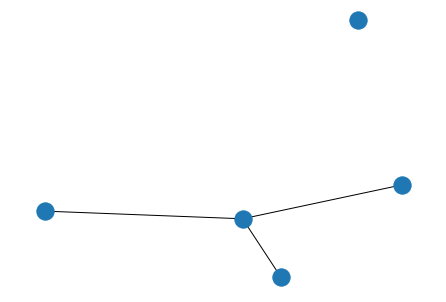

In [80]:
interaction_graph = fast_gnp_random_graph(5, 0.3)
nx.draw(interaction_graph)

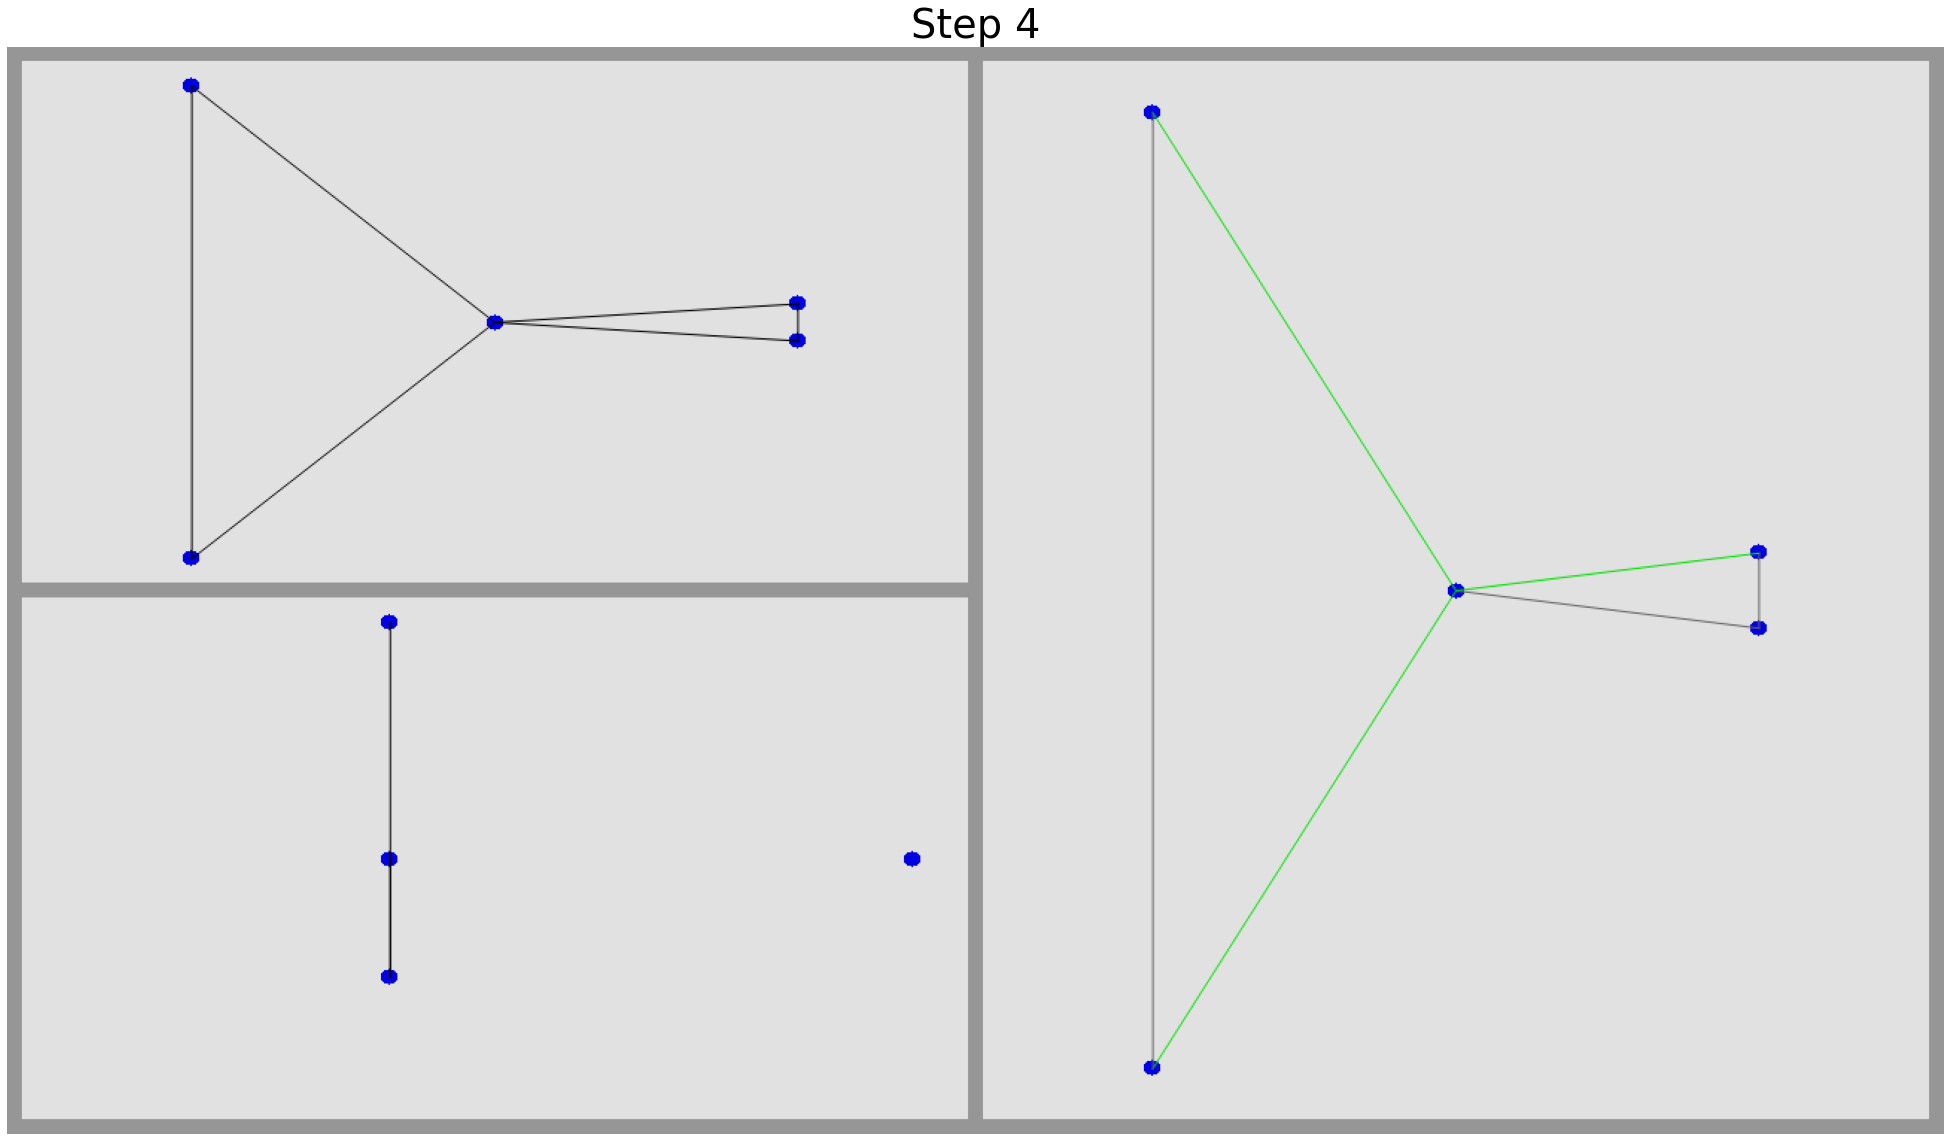

In [81]:
env = InitialMapping(0.5, connection_graph=connection_graph)
model = model.load("saved_model")
obs = env.reset(interaction_graph=interaction_graph)
for i in range(1000):
    action, states = model.predict(obs, deterministic=False)
    obs, rewards, done, info = env.step(action)
    render_rgb(i, env.render(mode="rgb_array"))
    if done:
        break